# unsupervised machine learning

Rules of kmeans clustering :-<br>
1. assume number of cluster k 
2. pick k points(can be outside cluster)
3. find centroid of each point.
4. repeat 2 and 3(till number of clusters are made according to centroid point

WCSS(within cluster sum of square). <br>
In the given cluster you will caculate the sum of square of the distance between the centroid and the points.
to decide till when we have to do we use the elbow method. <br>
Where the deviation between the number of points and the number of clusters is more is where we aim for 

# kmeans clustering

In [1]:
# handling data
import pandas as pd

In [2]:
# loading dataset
df = pd.read_csv('datasets/mallanalysis.csv')

In [3]:
# printing meta data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# printing  top 5data 
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# by manual analysis we have to decide the right columns
useful_data = df.iloc[:,[3,4]].values

In [7]:
# always start number of clusters by one
#now finding number of clusters and analyzing it by elbow method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [23]:
#anayzing kmeans
KMeans()
wcss = []
# lets assume max number of cluster is 10
for i in range(1,11):
    # called kmeans++ algo
    mykm = KMeans(n_clusters = i)
    # now applying this state to data
    mykm.fit(useful_data)
    wcss.append(mykm.inertia_) # here inertia_ means summary of formula 

In [24]:
print(wcss)

[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30273.394312070042, 25018.576334776335, 21850.165282585633, 19657.783608703958]


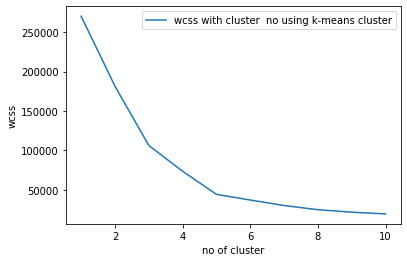

In [25]:
# plotting graph no of clusters vs wcss
plt.xlabel("no of cluster")
plt.ylabel("wcss")
plt.plot(range(1,11),wcss,label = "wcss with cluster  no using k-means cluster")
plt.legend()
plt.show()

In [27]:
# now we can assume number of cluster as 5 
# again calling number of clusters 
perfect_cls = KMeans(n_clusters = 5)

In [29]:
# now applying data for clustering 
predicted_cluster = perfect_cls.fit_predict(useful_data)# it comes when we know what cluster we want to use

In [32]:
#predicted_cluster

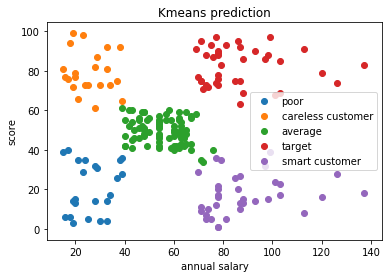

In [38]:
# now visualizing the output
plt.xlabel('annual salary')
plt.ylabel('score')
plt.title("Kmeans prediction")
plt.scatter(useful_data[predicted_cluster == 0,0],useful_data[predicted_cluster == 0,1],label = 'poor')
plt.scatter(useful_data[predicted_cluster == 1,0],useful_data[predicted_cluster == 1,1],label = 'careless customer')
plt.scatter(useful_data[predicted_cluster == 2,0],useful_data[predicted_cluster == 2,1],label = 'average')
plt.scatter(useful_data[predicted_cluster == 3,0],useful_data[predicted_cluster == 3,1],label = 'target')
plt.scatter(useful_data[predicted_cluster == 4,0],useful_data[predicted_cluster == 4,1],label = 'smart customer')
plt.legend()
plt.show()